In [1]:
import os
import cv2
import uuid
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path
from deepface import DeepFace

from lib.config import config
from lib.face_database import FaceDatabase
from lib.face_recognition import FaceRecognition

# Face Recognition Module
Powered by DeepFace (https://github.com/serengil/deepface/tree/master/deepface)

# 1. Initialize modules

Initialize `FaceRecognition` and `FaceDatabase`

In [93]:
face_database = FaceDatabase(**config.face_database)
face_recognition = FaceRecognition(**config.face_recognition)

## 1. Obtaining face images with labels

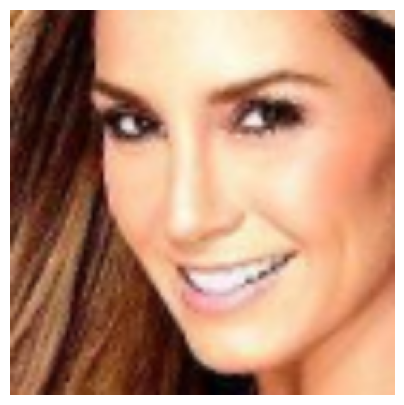

In [83]:
# 1. Get image (possibly with no or multiple faces)
im = cv2.imread('./CelebA/000001.jpg')

# 2. Detect faces
detected = face_recognition.get_faces(im)

# 3. For each face in the image, query label
labels = []
for it, individual in enumerate(detected):
    plt.figure(it, [5, 5]); plt.imshow(individual['face']); plt.axis('off')
    labels.append(input())

## 2. Inserting face images and labels into database

In [79]:
for individual, label in zip(detected, labels):
    face_database.store(individual['face'], label)
    individual['face'] = cv2.resize(individual['face'], (224,224))

## 3. Searching a match for new faces

There are  1  representations found in  representations_vgg_face.pkl
find function lasts  0.7763669490814209  seconds
Detected: A


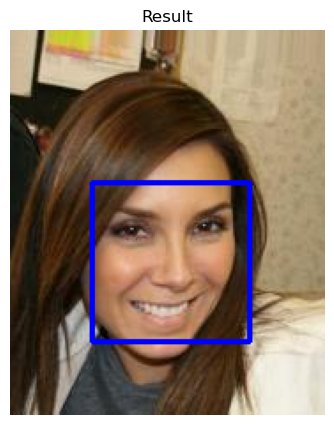

In [101]:
# 1. Get query image (possibly with no or multiple faces)
query = cv2.imread('./CelebA/140935.jpg').astype('uint8')

# 2. Find matches for each face
detected = face_recognition.find_faces(query, face_database)

# 3. Show matches
query = cv2.cvtColor(query, cv2.COLOR_BGR2RGB)
for label, bounding_box in detected:
    x, y, w, h = bounding_box
    cv2.rectangle(query, (x, y), (x+w, y+h), (0,0,255), 2)
    print(f'Detected: {label}')

plt.figure(1, [5, 5]); plt.title('Result'); plt.imshow(query); plt.axis('off');